# Amundi ETF with *Github Copilot*

In [3]:
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [1]:
# Install required packages
!pip install yfinance seaborn matplotlib pandas


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Amundi ETF PE500.PA Analysis

- Download 5 years of daily price data from Yahoo Finance
- Compute descriptive statistics (mean, std, min, max, etc.)
- Plot daily closing prices
- Visualize returns and other relevant statistics

In [4]:
import yfinance as yf
from datetime import datetime, timedelta

# Download 5 years of daily data for Amundi ETF PE500.PA
ticker = 'PE500.PA'
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)
data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), auto_adjust=False)

data.head()

[*********************100%***********************]  1 of 1 completed



Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PE500.PA,PE500.PA,PE500.PA,PE500.PA,PE500.PA,PE500.PA
Date,,,,,,
2020-09-02,23.410000,23.410000,23.499001,23.268000,23.268000,43923
2020-09-03,22.969999,22.969999,23.759001,22.802000,23.715000,11524
2020-09-04,22.393000,22.393000,23.068001,22.200001,22.730000,15400
2020-09-07,22.712999,22.712999,22.738001,22.450001,22.492001,7046
2020-09-08,22.260000,22.260000,22.778000,22.180000,22.752001,30331


In [8]:
# --- Statistics Analysis ---
import numpy as np

# Calculate daily log returns
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna()

# Annualized return and volatility (using log returns)
trading_days = 252
annualized_return = float(log_returns.mean()) * trading_days
annualized_volatility = float(log_returns.std()) * np.sqrt(trading_days)

# Sharpe ratio (assuming risk-free rate = 0)
sharpe_ratio = annualized_return / annualized_volatility

print('Annualized Return: {:.2%}'.format(annualized_return))
print('Annualized Volatility: {:.2%}'.format(annualized_volatility))
print('Sharpe Ratio: {:.2f}'.format(sharpe_ratio))

Annualized Return: 12.77%
Annualized Volatility: 15.82%
Sharpe Ratio: 0.81


C:\Users\Maël\AppData\Local\Temp\ipykernel_13324\462019233.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  annualized_return = float(log_returns.mean()) * trading_days
C:\Users\Maël\AppData\Local\Temp\ipykernel_13324\462019233.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  annualized_volatility = float(log_returns.std()) * np.sqrt(trading_days)


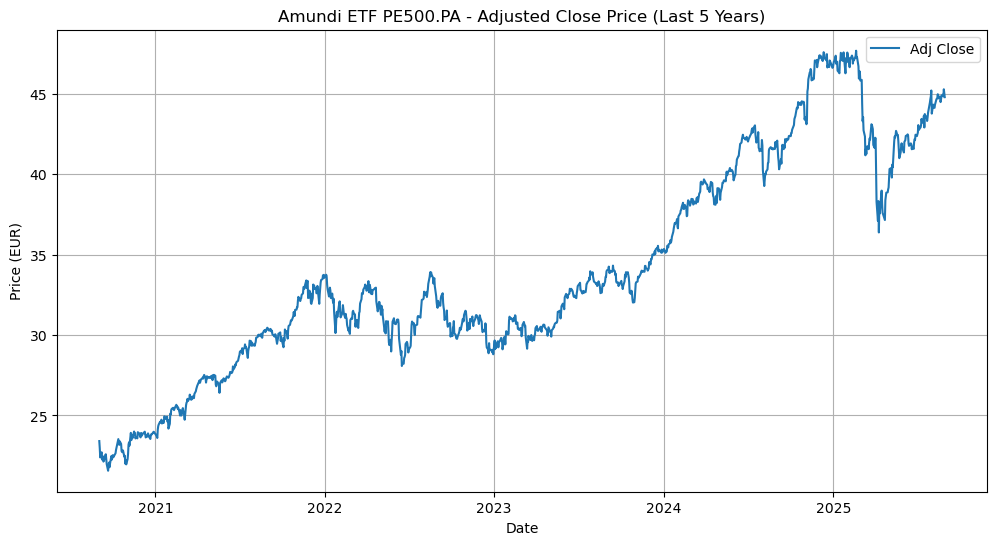

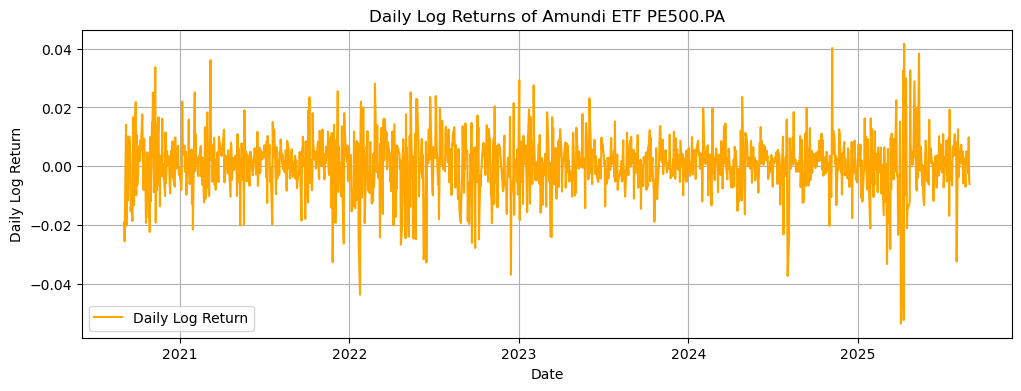

In [7]:
# --- Plotting ---
import matplotlib.pyplot as plt

# Plot daily adjusted close prices
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Adj Close')
plt.title('Amundi ETF PE500.PA - Adjusted Close Price (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (EUR)')
plt.legend()
plt.grid(True)
plt.show()

# Plot daily log returns
plt.figure(figsize=(12, 4))
plt.plot(log_returns, label='Daily Log Return', color='orange')
plt.title('Daily Log Returns of Amundi ETF PE500.PA')
plt.xlabel('Date')
plt.ylabel('Daily Log Return')
plt.legend()
plt.grid(True)
plt.show()